## Lab | Imbalanced data

In [2]:
# 0. Import libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [ ]:
# 1. Load the dataset and explore the variables.

In [42]:
df = pd.read_csv('customer_churn.csv')

In [43]:
# check data. Top 5 rows
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
# Check types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [45]:
# View dimensions

df.shape

(7043, 21)

In [46]:
# statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [47]:
# Check Nans
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


###  2. We will try to predict variable Churn using a Logistic Regression on variables: 
###  tenure, SeniorCitizen,MonthlyCharges


In [48]:
## Define explanatory variables and target vector

X = df[["tenure","SeniorCitizen","MonthlyCharges"]]
y = df["Churn"]

In [49]:
X

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


In [50]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

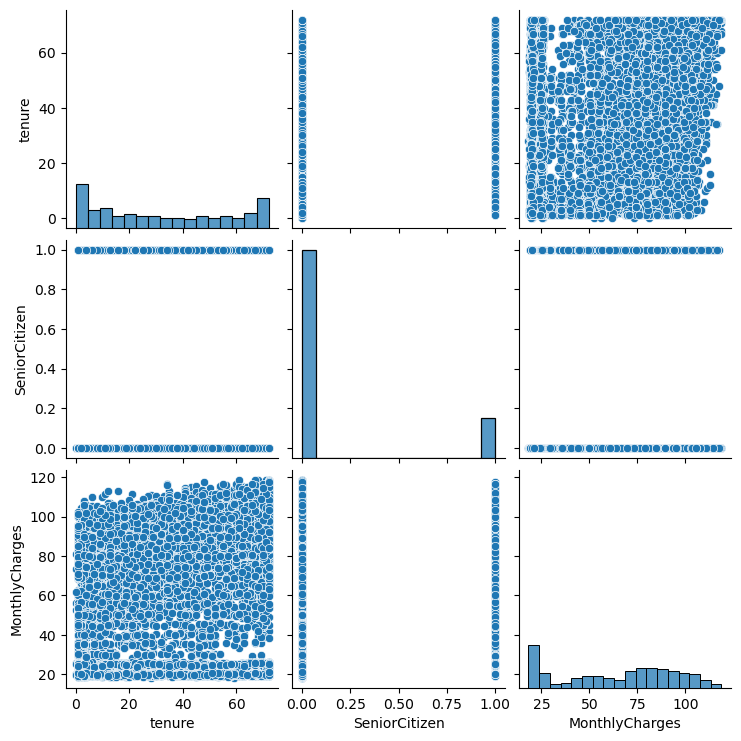

In [51]:
sns.pairplot(X)

In [19]:
y.value_counts()/len(y)  ## We check churn imbalance

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [ ]:
# -5. Build the regression model

# train/test split


In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [53]:
# We check
y_train.value_counts(normalize=True)

No     0.736842
Yes    0.263158
Name: Churn, dtype: float64

In [30]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

5282 1761 5282 1761


In [54]:
# Transform numerical data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
## Transform categorical data Churn (y) into 0s-1s

encoder=LabelEncoder()

y_train =encoder.fit_transform(y_train)
y_test =encoder.fit_transform(y_test)

In [58]:
y_train.shape


(5282,)

In [60]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [68]:
# We build the model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [69]:
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)

print(classification_report(y_test,pred_test))
print(classification_report(y_train,pred_train))
      

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1282
           1       0.70      0.46      0.55       479

    accuracy                           0.80      1761
   macro avg       0.76      0.69      0.71      1761
weighted avg       0.79      0.80      0.78      1761

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      3892
           1       0.64      0.44      0.52      1390

    accuracy                           0.79      5282
   macro avg       0.73      0.68      0.69      5282
weighted avg       0.77      0.79      0.77      5282



In [73]:
# Let´s check accuracy as well:
print("accuracy_train:",accuracy_score(y_train,pred_train))
print("accuracy_test:",accuracy_score(y_test,pred_test))

accuracy_train: 0.7879591063990913
accuracy_test: 0.7978421351504826


In [ ]:
# The reason for such a high score would typically thereis actual linear relationhsip between features and target variable. 
# Nevertheless unbalanced (74%-26%) data makes the model to learn much better No´s than Yes´s and these already accounts for 74%# 
# So actually such a high value doesn´t mean the model is predicting properly.
# Let´s balance the data and see

In [101]:
# 8. Correcting Imbalance.  Applying SMOTE
# Synthetic Minority Oversampling TEchnique (SMOTE)

sm = SMOTE(k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)



In [102]:
# We check imbalance

print(X_train.shape)
print(X_train_SMOTE.shape)

(5282, 3)
(7784, 3)


In [83]:
# Smote has upsampled data


In [87]:
# We apply the model to balanced data

7784

In [104]:
model = LogisticRegression()
model.fit(X_train_SMOTE,y_train_SMOTE)

LogisticRegression()

In [105]:
pred_test_SMOTE = model.predict(X_test)
pred_train_SMOTE = model.predict(X_train_SMOTE)

print(classification_report(y_test,pred_test_SMOTE))
print(classification_report(y_train_SMOTE,pred_train_SMOTE))

              precision    recall  f1-score   support

           0       0.89      0.73      0.81      1282
           1       0.52      0.76      0.62       479

    accuracy                           0.74      1761
   macro avg       0.70      0.75      0.71      1761
weighted avg       0.79      0.74      0.75      1761

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      3892
           1       0.73      0.74      0.73      3892

    accuracy                           0.73      7784
   macro avg       0.73      0.73      0.73      7784
weighted avg       0.73      0.73      0.73      7784



In [ ]:
# We can´t see an improvement overall

In [106]:
# 9. We apply now Tomeks Links:

ts = TomekLinks(sampling_strategy='all')
X_train_TS, y_train_TS = ts.fit_resample(X_train, y_train)

In [93]:
# We check imbalance

print(X_train.shape)
print(X_train_TS.shape)

(5282, 3)
(4504, 3)


In [94]:
# Smote has undersampled data

In [107]:
model = LogisticRegression()
model.fit(X_train_TS,y_train_TS)

LogisticRegression()

In [108]:
# We apply the model to balanced data
pred_test_TS = model.predict(X_test)
pred_train_TS = model.predict(X_train_TS)

print(classification_report(y_test,pred_test_TS))
print(classification_report(y_train_TS,pred_train_TS))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1282
           1       0.70      0.46      0.56       479

    accuracy                           0.80      1761
   macro avg       0.76      0.69      0.71      1761
weighted avg       0.79      0.80      0.78      1761

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3503
           1       0.68      0.50      0.58      1001

    accuracy                           0.84      4504
   macro avg       0.78      0.72      0.74      4504
weighted avg       0.83      0.84      0.83      4504



In [ ]:
# We can see an IMPORTANT improvement overall although unbalance of predictions are kept. Model is better predicting class 0